In [1]:
import os
import readData
import objects
from types import SimpleNamespace
import numpy as np
from matplotlib import pyplot as plt

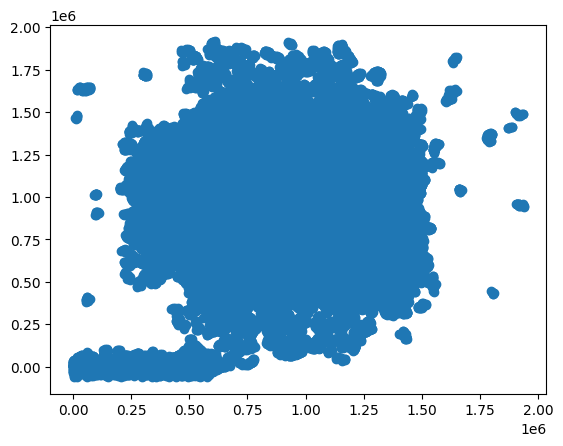

In [10]:
cwd = os.getcwd()
dataPath = os.path.join('c:\\Users\\vkuma\\Research\\', 'Data', 'SyntheticData', 'syntheticData_20230706_112323', 'data.csv')
dataVect, dataVectIndex, deltaT = readData.dataReader(dataPath, 1)
dataVect = dataVect*97
plt.scatter(dataVect[:,0], dataVect[:,1])

In [18]:
#declare variables as instance of SimpleNamespace
variables = SimpleNamespace(**objects.PARAMETERS)

data = SimpleNamespace(**objects.DATA)
data.trajectoriesIndex = dataVectIndex
data.trajectories = dataVect
data.deltaT = deltaT
data.nData = len(data.trajectoriesIndex)
data.nTrajectories = np.unique(data.trajectoriesIndex)

#pull necassary variables
trajectories = data.trajectories
nData = data.nData
nTraj = data.nTrajectories
trajectoriesIndex = data.trajectoriesIndex
nInduX = 50
nInduY = 50
nFineX = variables.nFineX
nFineY = variables.nFineY
epsilon = variables.epsilon
deltaT = data.deltaT
dataX = trajectories[:,0]
dataY = trajectories[:,1]
minX = min(dataX)
minY = min(dataY)
maxX = max(dataX)
maxY = max(dataY)
nIndu = nInduX*nInduY
covL = variables.covL
covLambda = variables.covLambda

In [19]:
#Points of trajectory where learning is possible
dataCoordinates = np.empty((0,2))
for i in range(nData-1):
    if (trajectoriesIndex[i] == trajectoriesIndex[i+1]):
        dataCoordinates = np.vstack((dataCoordinates, trajectories[i]))

#Points of trajectory that are "sampled"
sampleCoordinates = np.empty((0,2))
for i in range(1,nData):
    if (trajectoriesIndex[i] == trajectoriesIndex[i-1]):
        sampleCoordinates = np.vstack((sampleCoordinates, trajectories[i]))

In [20]:
#Initial Guess with MLE
diff = sampleCoordinates - dataCoordinates
num = np.sum(diff * diff)
den = 4*deltaT*len(diff)
mle = num/den
dIndu = mle * np.ones(nIndu)
priorMean = dIndu.copy()

#Estimate Hyperparameters if not chosen by user
if covL == None:
    covL = np.max([maxX-minX, maxY-minY]) * 0.05
if covLambda == None:
    covLambda = mle/10

#define coordinates for Inducing points
xIndu = np.linspace(minX-covL, maxX+covL, nInduX)
yIndu = np.linspace(minY-covL, maxY+covL, nInduY)
xTemp, yTemp = np.meshgrid(xIndu, yIndu)
X = np.reshape(xTemp, -1)
Y = np.reshape(yTemp, -1)
induCoordinates = np.vstack((X, Y)).T

#define coordinates for Fine points
xFine = np.linspace(minX, maxX, nFineX)
yFine = np.linspace(minY, maxY, nFineY)
xTemp, yTemp = np.meshgrid(xFine, yFine)
X = np.reshape(xTemp, -1)
Y = np.reshape(yTemp, -1)
fineCoordinates = np.vstack((X, Y)).T

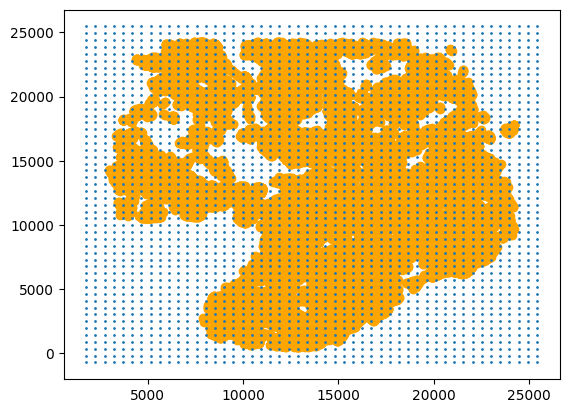

In [21]:
plt.scatter(dataCoordinates[:,0], dataCoordinates[:,1], label = "data", color = "orange")
plt.scatter(induCoordinates[:,0], induCoordinates[:,1], label = "original inducing points", s =1)

In [22]:
remove1 = []
for i in xIndu:
    for j in induCoordinates[np.where(induCoordinates[:,0] == i)]:
        if(np.min(np.linalg.norm(dataCoordinates-j, axis=1)) >= 0.25*covL):
            remove1.append(j)
        else:
            break
for i in yIndu:
    for j in induCoordinates[np.where(induCoordinates[:,1] == i)]:
        if(np.min(np.linalg.norm(dataCoordinates-j, axis=1)) >= 0.25*covL):
            remove1.append(j)
        else:
            break
for i in xIndu:
    for j in reversed(induCoordinates[np.where(induCoordinates[:,0] == i)]):
        if(np.min(np.linalg.norm(dataCoordinates-j, axis=1)) >= 0.25*covL):
            remove1.append(j)
        else:
            break
for i in yIndu:
    for j in reversed(induCoordinates[np.where(induCoordinates[:,1] == i)]):
        if(np.min(np.linalg.norm(dataCoordinates-j, axis=1)) >= 0.25*covL):
            remove1.append(j)
        else:
            break
indicies = []
for i in remove1:    
    indicies.append(np.where(np.all(induCoordinates==i,axis=1))[0][0])
induCoordinatesNew = np.delete(induCoordinates, indicies, axis = 0)

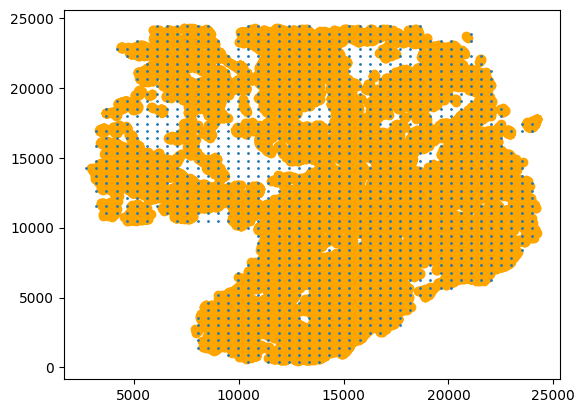

In [23]:
plt.scatter(dataCoordinates[:,0], dataCoordinates[:,1], label = "data", color = "orange")
plt.scatter(induCoordinatesNew[:,0], induCoordinatesNew[:,1], label = "New inducing points", s =1)

In [26]:
len(induCoordinatesNew)

1448

In [ ]:
# Calculate probabilities of induced samples
def probability(dIndu_, dData_):
    
    # Prior
    diff = dIndu_ - priorMean
    prior = -0.5*(diff.T @ (cInduInduInv @ diff))
    
    #Likelihood of that data
    lhood = 0
    for i in range(samples.shape[0]):
        for j in range(samples.shape[1]):
            lhood += (
                -.5 * (samples[i, j] - means[i, j])**2 / (2*dData_[j]*deltaT)
                - .5 * np.log(2*np.pi*2*dData_[j]*deltaT)
            )
    prob = lhood + prior

    return prob

In [ ]:
 # Define probability of inducing points
def probability1(dIndu_, dData_):

    # Prior
    diff = dIndu_ - priorMean
    prior =  -0.5*(diff.T @ (cInduInduInv @ diff))
    
    #Likelihood of that data
    lhood = np.sum(
        stats.norm.logpdf(
            samples,
            loc=means,
            scale=np.sqrt(2*np.vstack((dData_, dData_)).T*deltaT)
        )
    )
    prob = lhood + prior

    return prob

In [ ]:
file = open("C:\\Users\\vkuma\\Downloads\\200000 1 1999.9119199787813variables.pkl", "rb")
variables = pkl.load(file)
file = open("C:/Users/vkuma/Research/LearningDiffusionMaps/1000 1 1999.9119199787813data.pkl", "rb")
data = pkl.load(file)

In [ ]:
variables

namespace(nInduX=50,
          nInduY=50,
          nFineX=100,
          nFineY=100,
          dataCoordinates=array([[ 7647.52114926,  7792.10524414],
                                 [ 7570.91656368,  7753.27337678],
                                 [ 7662.5989301 ,  7840.33166041],
                                 ...,
                                 [14673.17096069, 15328.18225775],
                                 [14710.11726827, 15399.50656459],
                                 [14663.92493378, 15411.64739748]]),
          sampleCoordinates=array([[ 7570.91656368,  7753.27337678],
                                   [ 7662.5989301 ,  7840.33166041],
                                   [ 7667.21908281,  7851.2599919 ],
                                   ...,
                                   [14710.11726827, 15399.50656459],
                                   [14663.92493378, 15411.64739748],
                                   [14584.14557545, 15397.1200031 ]]),
          induCo

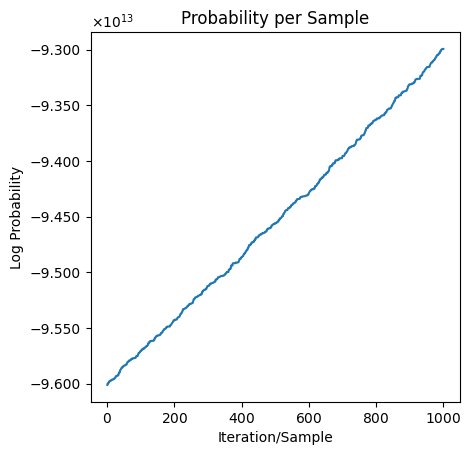

In [ ]:
file = "C:/Users/vkuma/Research/LearningDiffusionMaps/1000(1 1999.9119199787813).h5"
f = h5py.File(file, 'r')
dVect= f['samples'][()]
pVect = f['prob'][()]
fig, ax = plt.subplots(1, 1)
plt.plot(pVect)
plt.title("Probability per Sample")
plt.xlabel("Iteration/Sample")
plt.ylabel("Log Probability")
plt.ticklabel_format(useMathText=True)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
class ScalarFormatterClass(ticker.ScalarFormatter):
   def _set_format(self):
      self.format = "%1.3f"
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yScalarFormatter)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')


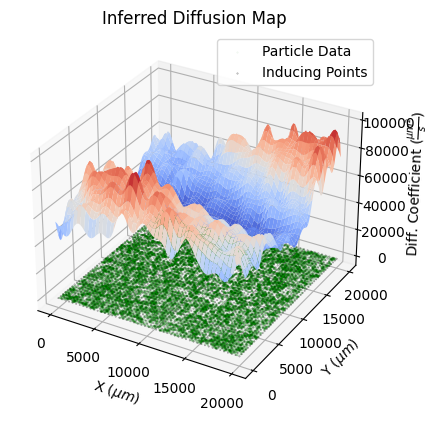

interactive(children=(IntSlider(value=45, description='elevation', max=90, step=5), IntSlider(value=0, descrip…

C:\Users\vkuma\AppData\Local\Temp\ipykernel_15376\3742743997.py:49: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(surf, shrink=0.5, anchor=(0.5, 0.5))


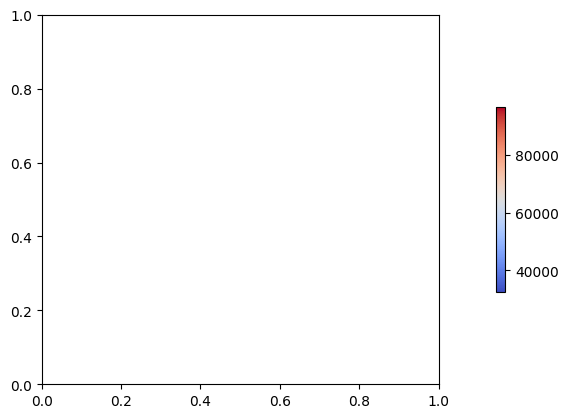

In [ ]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories
induCoordinates = variables.induCoordinates 

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = (cInduFine.T @ (cInduInduInv @ dVect[0]))

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.colors
from ipywidgets import interact

# Generate contour plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(shapedX, shapedY, shapedMap, cmap=cm.coolwarm)
scatter_particles = ax.scatter(trajectories[:, 0], trajectories[:, 1], 0, color="green", alpha=0.1, label="Particle Data", s = 0.1)
scatter_inducing = ax.scatter(induCoordinates[:, 0], induCoordinates[:, 1], 0, color="black", alpha=0.5, label="Inducing Points", s=0.1)
ax.set_xlabel(r"X ($\mu m$)")
ax.set_ylabel(r"Y ($\mu m$)")
ax.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
ax.set_title("Inferred Diffusion Map")
ax.legend()

# Create a function to update the contour plot based on parameters
def update_plot(elevation, azimuth):
    ax.view_init(elev=elevation, azim=azimuth)

# Create an interactive widget for the plot
interact(update_plot, elevation=(0, 90, 5), azimuth=(-180, 180, 10))

# Display the plot
plt.colorbar(surf, shrink=0.5, anchor=(0.5, 0.5))
plt.show()

In [ ]:
plt.show()

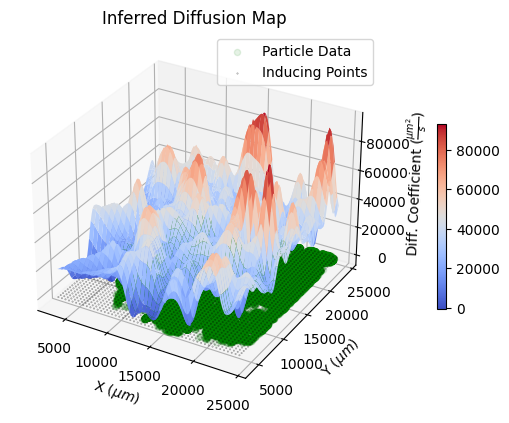

In [ ]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories
induCoordinates = variables.induCoordinates 

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = (cInduFine.T @ (cInduInduInv @ dVect[0]))

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)




#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX, shapedY, shapedMap, cmap=cm.coolwarm)
fig.scatter3D(trajectories[:,0], trajectories[:,1], 0, color = "green", alpha = 0.1, label = "Particle Data")
fig.scatter3D(induCoordinates[:,0], induCoordinates[:,1], 0, color = "black", alpha = 0.5, label = "Inducing Points", s = 0.1)
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Inferred Diffusion Map")
#ticks = np.arange(0, 45, 15)/100
fig.legend()
#fig.set_zticks(ticks)
norm = matplotlib.colors.Normalize(vmin=np.min(shapedMap), vmax=np.max(shapedMap))
m = cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
m.set_array([])
plt.colorbar(m, shrink = 0.5, anchor = (0.5, 0.5));

In [ ]:
np.shape(dVect[1000])

(2500,)

In [ ]:
#read datafile
with open("C:/Users/vkuma/Downloads/data_to_share.txt") as inp:
    tempData = [i.strip().split('\t') for i in inp]

#clean the data
cleanData = []
for i in tempData:
    if i != ['']:
        cleanData.append(i)

#coordinates for trajectories
x = np.array([float(i[2]) for i in cleanData])
y = np.array([float(i[3]) for i in cleanData])

# Initialize variables
data = SimpleNamespace(**objects.DATA)
data.trajectoriesIndex = np.array([int(i[0]) for i in cleanData])
data.trajectories = np.vstack((x,y)).T
data.deltaT = 0.0001
data.nData = len(data.trajectoriesIndex)
data.nTrajectories = np.unique(data.trajectoriesIndex)

variables = functions.initialization(objects.PARAMETERS, data, 1, 10)



In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/250000probability(1 20).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/250000samples(1 20).csv')
dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)


In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/data/mix map samples/250000probability(1 10).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/data/mix map samples/250000samples(1 10).csv')

dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)


In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/data/(1 20)/850000probability(1 20).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/data/(1 20)/850000samples(1 20).csv')
dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)


In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/data/mix map samples/400000probability(1 20).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/data/mix map samples/400000samples(1 20).csv')
dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)

In [ ]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories
induCoordinates = variables.induCoordinates 

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect, 0)

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)/1000
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)




#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX, shapedY, shapedMap, cmap=cm.coolwarm)
fig.scatter3D(trajectories[:,0], trajectories[:,1], 0, color = "green", alpha = 0.1, label = "Particle Data")
fig.scatter3D(induCoordinates[:,0], induCoordinates[:,1], 0, color = "black", alpha = 0.5, label = "Inducing Points")
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Inferred Diffusion Map")
ticks = np.arange(0, 20/1000, 5/1000)
fig.legend()
fig.set_zticks(ticks)

In [ ]:
#generate plot
fig, ax = plt.subplots(1, 1)
plt.plot(pVect[100:])
plt.title("Probability per Sample")
plt.xlabel("Iteration/Sample")
plt.ylabel("Log Probability")
plt.ticklabel_format(useMathText=True)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
class ScalarFormatterClass(ticker.ScalarFormatter):
   def _set_format(self):
      self.format = "%1.2f"
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yScalarFormatter)
#ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/250000probability(1 10).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/250000samples(1 10).csv')
dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)


In [ ]:
#read datafile
file = open("C:/Users/vkuma/Research/GPcurve/syntheticData2Gauss.txt")
fullArray = np.loadtxt(file,delimiter = ",")

#coordinates for trajectories
x = fullArray[:,1]
y = fullArray[:,2]
# Initialize variables
data = SimpleNamespace(**objects.DATA)
data.trajectoriesIndex = fullArray[:,0]
data.trajectories = np.vstack((x,y)).T
data.deltaT = 1
data.nData = len(data.trajectoriesIndex)
data.nTrajectories = np.unique(data.trajectoriesIndex)

variables = functions.initialization(objects.PARAMETERS, data, 1, 10)

In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/150000probability(1 10).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/150000samples(1 10).csv')
dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)

In [ ]:
syntheticData.plots(variables, dVect, pVect)

In [ ]:
#read datafile
file = open("C:/Users/vkuma/Research/GPcurve/syntheticData2Gauss.csv")
fullArray = np.loadtxt(file,delimiter = ",")

#coordinates for trajectories
x = fullArray[:,1]
y = fullArray[:,2]
# Initialize variables
data = SimpleNamespace(**objects.DATA)
data.trajectoriesIndex = fullArray[:,0]
data.trajectories = np.vstack((x,y)).T
data.deltaT = 1
data.nData = len(data.trajectoriesIndex)
data.nTrajectories = np.unique(data.trajectoriesIndex)

variables = functions.initialization(objects.PARAMETERS, data, 1, 10)

In [ ]:
pVect = []
with open('C:/Users/vkuma/Research/GPcurve/150000probability(1 10).csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        pVect.append(float(row[0]))

file = open('C:/Users/vkuma/Research/GPcurve/150000samples(1 10).csv')
dVect = np.loadtxt(file,delimiter = ",")

In [ ]:
plot5 = functions.plotThreeD(variables, dVect, data)
plot1 = functions.plots(variables, dVect, pVect, data)
plot2 = functions.probPlot(pVect)
plot3 = functions.probPlot(pVect[100:])
plot4 = functions.meanPlot(variables, dVect, data)

In [ ]:
syntheticData.plots(variables, dVect, pVect)
syntheticData.diffPlot(variables, dVect, pVect)
syntheticData.meanPlot(variables, dVect, pVect)

In [ ]:
import numpy as np

matrix1 = np.random.rand(2500,250000)
matrix2 = np.random.rand(250000,2500)

result = matrix1 @ matrix2

print(result)


In [ ]:
result = matrix1 @ matrix2

print(result)

In [ ]:
x = [19.7, 19.6, 19.4, 19.2, 19, 18.8, 18.6, 18.4, 18.2, 18]

a, b = np.polyfit(x, y, 1)

In [ ]:
import sys

# Define the number of floats in the array
num_floats = (2500*1+2500*2500)*2500*0.1

# Determine the size of a float on the system
float_size = sys.getsizeof(float())

# Calculate the total memory required
total_memory = float_size * num_floats

# Convert the memory size to human-readable format
def sizeof_fmt(num, suffix='B'):
    for unit in ['', 'Ki', 'Mi', 'Gi', 'Ti', 'Pi', 'Ei', 'Zi']:
        if abs(num) < 1024.0:
            return f"{num:.1f} {unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f} Yi{suffix}"

# Print the total memory required
print(f"Total memory required: {sizeof_fmt(total_memory)}")


Total memory required: 34.9 GiB
